# 10-projeto-10-Tranfer-learning-classificar-gatos-e-cachorros

### importação das bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile

### importação do modelo com os pesos pré treinados

In [2]:
model = tf.keras.applications.ResNet50(weights= 'imagenet')

102973440/102967424 [==============================] - 889s 9us/step


In [3]:
path = 'datasets/Transfer-Learning-Data 1.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('datasets/')
zip_object.close()

In [5]:
sample_img = tf.keras.preprocessing.image.load_img(r'datasets/Transfer Learning Data/bicycle.png', 
                                                   target_size=(224,224))

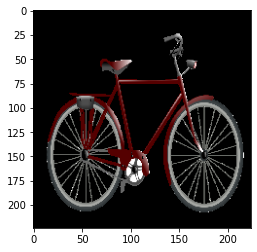

In [7]:
plt.imshow(sample_img);

In [8]:
type(sample_img)

PIL.Image.Image

In [9]:
sample_img = tf.keras.preprocessing.image.img_to_array(sample_img)
type(sample_img)

numpy.ndarray

In [10]:
np.shape(sample_img)

(224, 224, 3)

In [11]:
#convertendo para o valor de batch

sample_img = np.expand_dims(sample_img, axis=0)
sample_img.shape

(1, 224, 224, 3)

In [12]:
np.min(sample_img), np.max(sample_img)

(0.0, 255.0)

In [13]:
#pre processando a imagem para enviar para a resnet
sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
np.min(sample_img), np.max(sample_img)

(-123.68, 151.061)

In [16]:
predicition = model.predict(sample_img)
print(f'predictions: {tf.keras.applications.resnet50.decode_predictions(predicition, top=5)}')

predictions: [[('n02835271', 'bicycle-built-for-two', 0.6329612), ('n03792782', 'mountain_bike', 0.05375585), ('n04482393', 'tricycle', 0.049758054), ('n03599486', 'jinrikisha', 0.015690302), ('n04507155', 'umbrella', 0.010513367)]]


In [40]:
def predict_image_resnet50(path_img):
    
    path = fr'{path_img}'
    #carregando a imagem
    sample_img = tf.keras.preprocessing.image.load_img(path, 
                                                   target_size=(224,224))
    img = sample_img.copy()
    #convertendo ela pra array
    sample_img = tf.keras.preprocessing.image.img_to_array(sample_img)
    
    #convertendo para o valor de batch compativel

    sample_img = np.expand_dims(sample_img, axis=0)
    sample_img.shape

    #pre processando a imagem para enviar para a resnet
    sample_img = tf.keras.applications.resnet50.preprocess_input(sample_img)
    np.min(sample_img), np.max(sample_img)
    
    predicition = model.predict(sample_img)
    print(f'predictions: {tf.keras.applications.resnet50.decode_predictions(predicition, top=5)}')
    return(plt.imshow(img))

predictions: [[('n02835271', 'bicycle-built-for-two', 0.6329612), ('n03792782', 'mountain_bike', 0.05375585), ('n04482393', 'tricycle', 0.049758054), ('n03599486', 'jinrikisha', 0.015690302), ('n04507155', 'umbrella', 0.010513367)]]


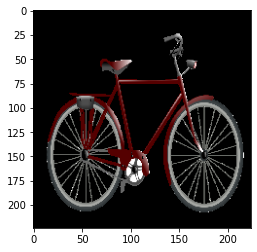

In [41]:

predict_image_resnet50('datasets/Transfer Learning Data/bicycle.png')


predictions: [[('n01871265', 'tusker', 0.6549784), ('n02113799', 'standard_poodle', 0.13240653), ('n02504458', 'African_elephant', 0.09300277), ('n02504013', 'Indian_elephant', 0.07018624), ('n02102973', 'Irish_water_spaniel', 0.024731899)]]


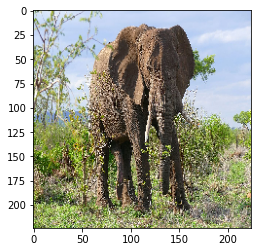

In [42]:
predict_image_resnet50('datasets/Transfer Learning Data/African_Elephant.jpg')


predictions: [[('n02123045', 'tabby', 0.83879507), ('n02123159', 'tiger_cat', 0.08255234), ('n02124075', 'Egyptian_cat', 0.05294355), ('n04589890', 'window_screen', 0.009460859), ('n03958227', 'plastic_bag', 0.001445955)]]


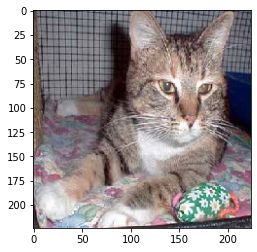

In [43]:
predict_image_resnet50('datasets/Transfer Learning Data/cat.282.jpg')


predictions: [[('n02089078', 'black-and-tan_coonhound', 0.3203152), ('n02107142', 'Doberman', 0.2914504), ('n02106550', 'Rottweiler', 0.09786509), ('n02107908', 'Appenzeller', 0.043424346), ('n02105412', 'kelpie', 0.042281102)]]


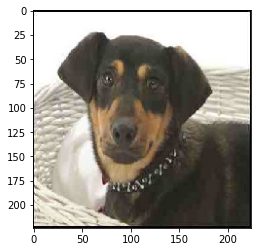

In [46]:

predict_image_resnet50('datasets/Transfer Learning Data/dog.309.jpg')

predictions: [[('n02129165', 'lion', 0.99799216), ('n02480495', 'orangutan', 0.00044723618), ('n02130308', 'cheetah', 0.00021210405), ('n02129604', 'tiger', 0.00018189446), ('n02128925', 'jaguar', 0.00014609988)]]


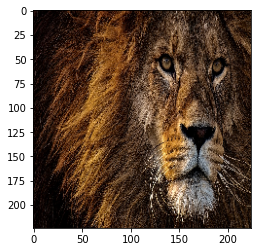

In [47]:

predict_image_resnet50('datasets/Transfer Learning Data/Lion.jpg')

predictions: [[('n04328186', 'stopwatch', 0.99394786), ('n02708093', 'analog_clock', 0.004688473), ('n03197337', 'digital_watch', 0.0007467053), ('n04548280', 'wall_clock', 0.00012209419), ('n02794156', 'barometer', 7.7139375e-05)]]


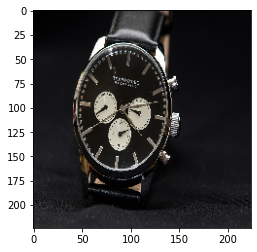

In [48]:

predict_image_resnet50('datasets/Transfer Learning Data/watch.jpg')